In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Load historical stock price data
df = pd.read_csv('C:\\Users\\dell\\Downloads\\stock_data.csv')
df = df[['Date', 'Close']] 
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
# Sort the data by date
df = df.sort_values(by='Date')

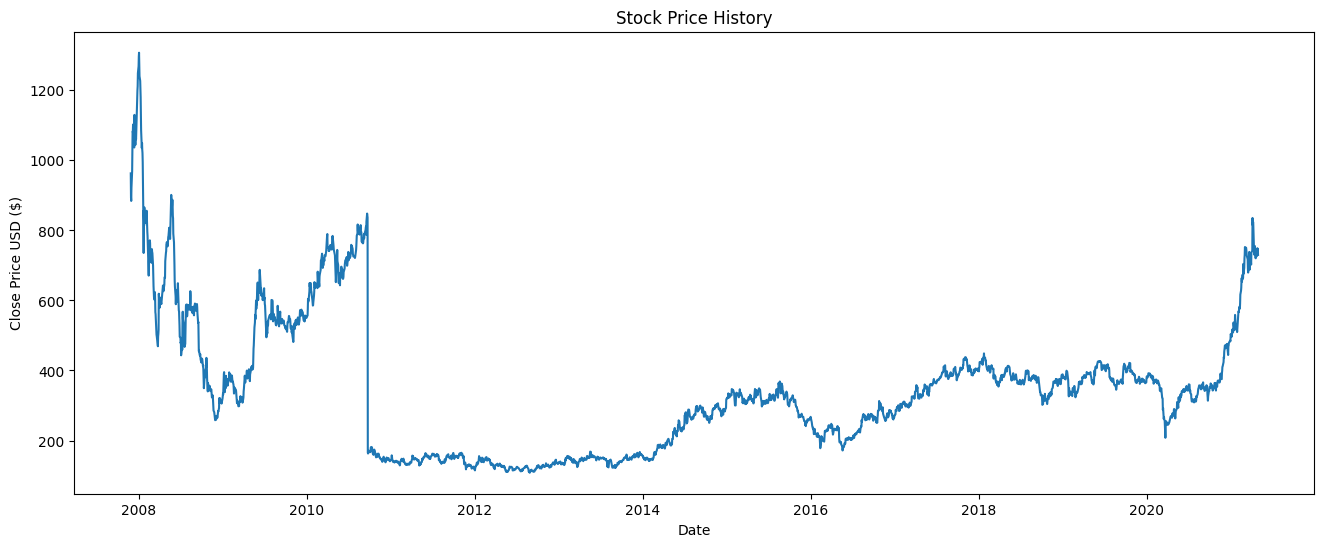

In [4]:
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Date'], df['Close'])
plt.show()

In [5]:
# Prepare the data for training
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95)) 

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [7]:
# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

In [8]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [9]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3096/3096 [==============================] - 107s 32ms/step - loss: 9.8508e-04


In [14]:
# Test data set
test_data = scaled_data[training_data_len - 60:, :]

In [15]:
# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [17]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [18]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 2s 23ms/step


In [19]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 42.643034886719555


In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  
valid.loc[:, 'Predictions'] = predictions

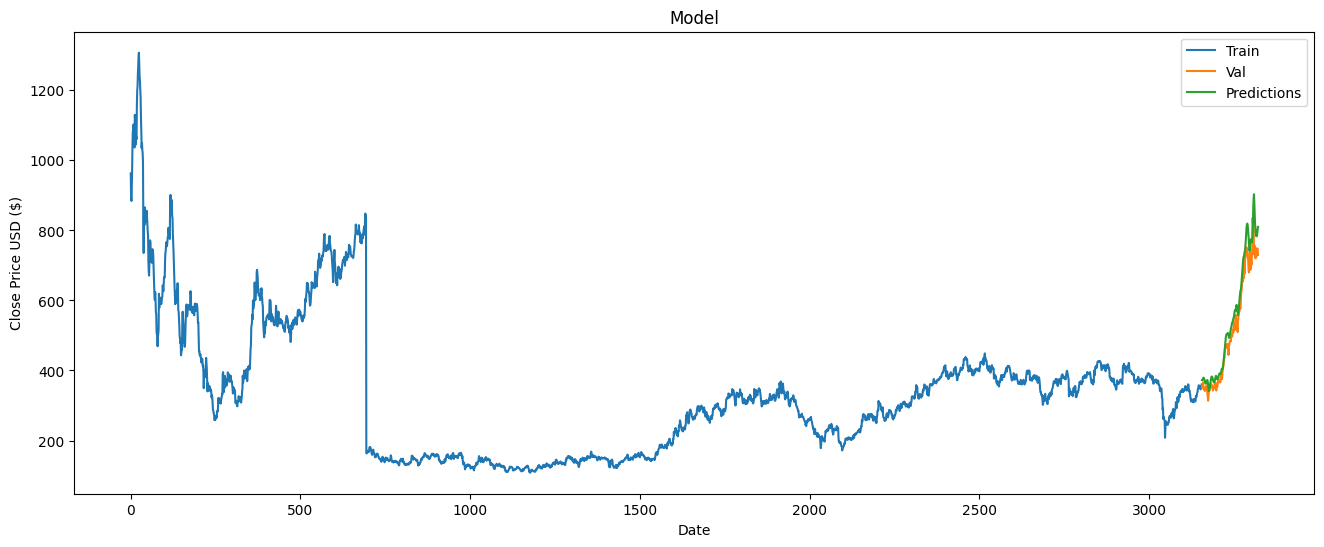

In [21]:
# Visualize the model's performance
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()